# Explore here

In [12]:
!pip install missingno lazypredict scikit-optimize
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import cross_val_score
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
# import joblib

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

In [15]:
df.shape


(1338, 7)

In [16]:
df.nunique()
df.dropna(inplace=True)

In [17]:
df.duplicated().sum()

1

In [18]:
df.isnull().mean() * 100

age        0.00
sex        0.00
bmi        0.00
children   0.00
smoker     0.00
region     0.00
charges    0.00
dtype: float64

In [19]:
df = df.drop_duplicates()

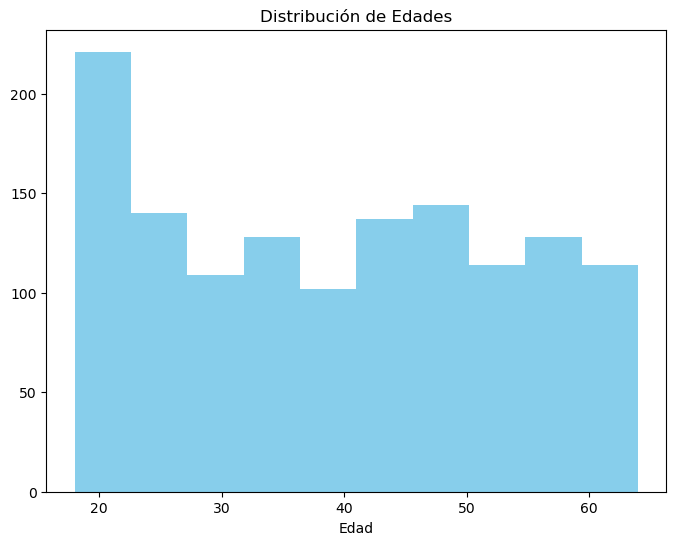

In [20]:
# Crea un histograma de la columna 'age'
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, color='skyblue')
plt.xlabel('Edad')
plt.title('Distribución de Edades')
plt.show()

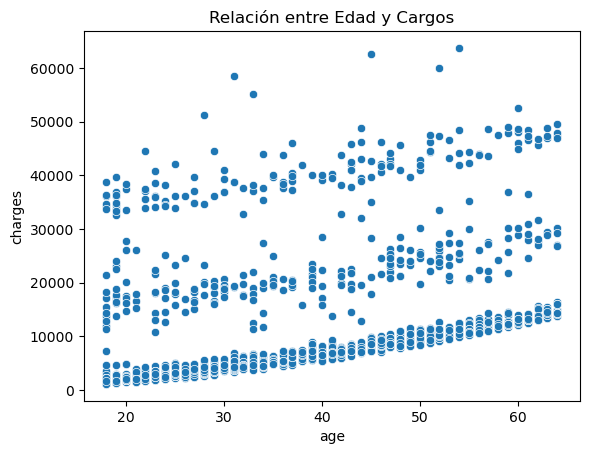

In [21]:
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Relación entre Edad y Cargos')
plt.show()

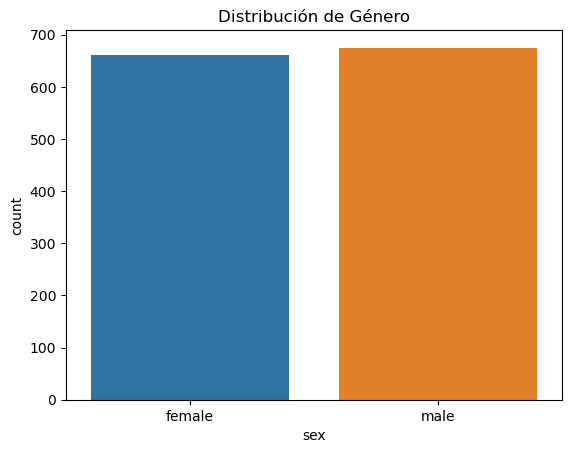

In [22]:
sns.countplot(data=df, x='sex')
plt.title('Distribución de Género')
plt.show()

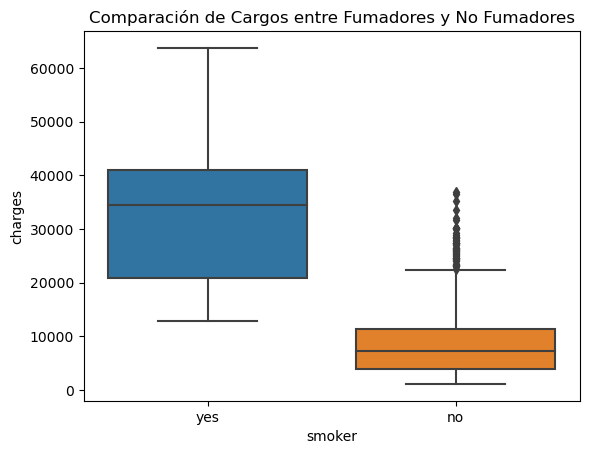

In [23]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Comparación de Cargos entre Fumadores y No Fumadores')
plt.show()

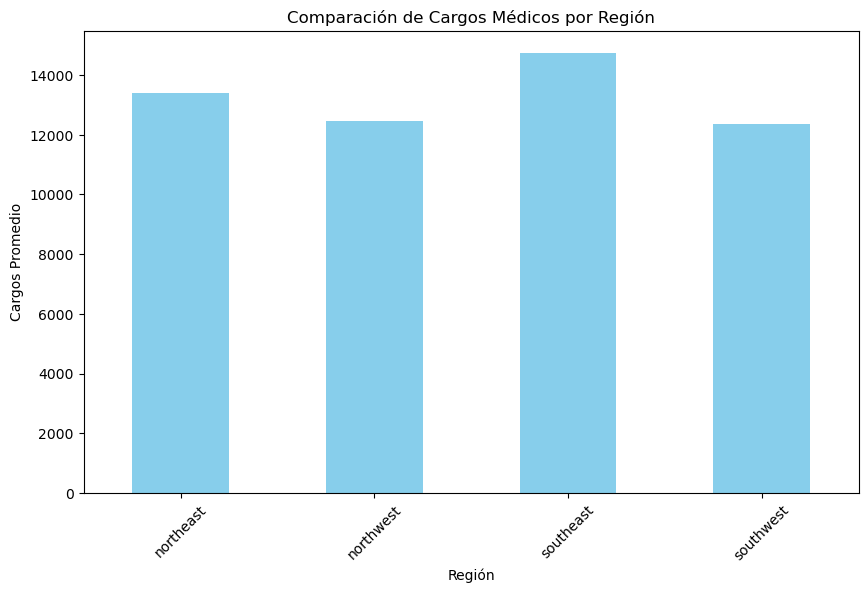

In [24]:
# Agrupa los datos por la columna 'region' y calcula el promedio de 'charges' en cada región
region_charges_mean = df.groupby('region')['charges'].mean()
# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
region_charges_mean.plot(kind='bar', color='skyblue')
plt.title('Comparación de Cargos Médicos por Región')
plt.xlabel('Región')
plt.ylabel('Cargos Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
# Muestra el gráfico
plt.show()

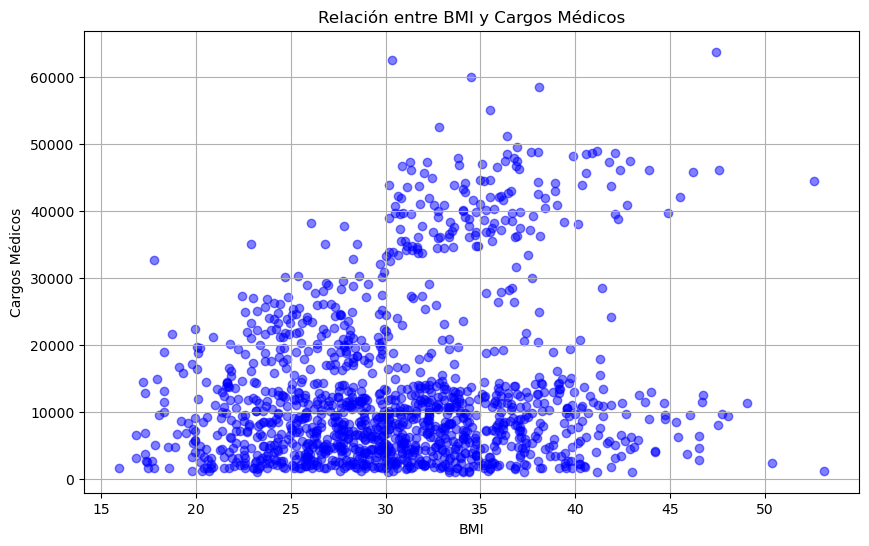

In [25]:
# Crea un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.5, color='blue')
plt.title('Relación entre BMI y Cargos Médicos')
plt.xlabel('BMI')
plt.ylabel('Cargos Médicos')
plt.grid(True)
# Muestra el gráfico
plt.show()

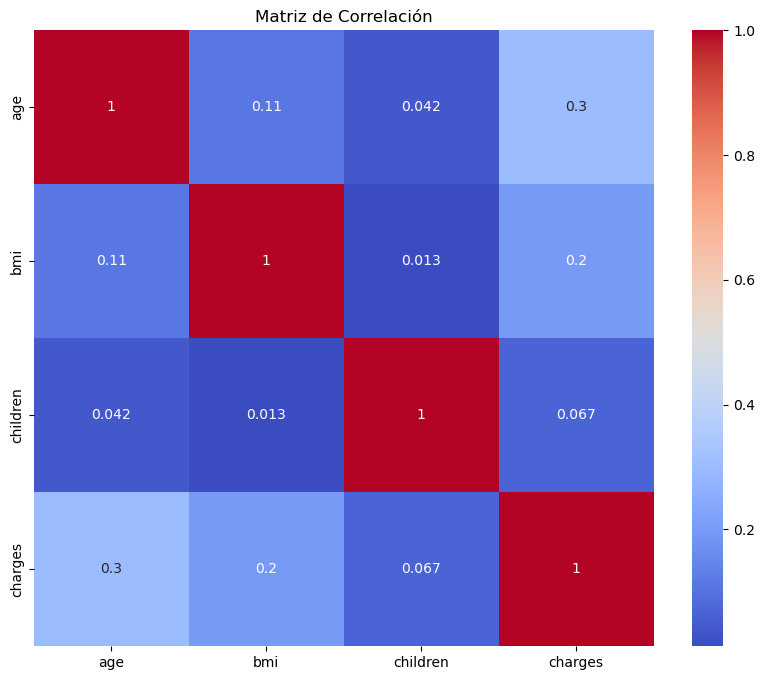

In [26]:
numerical_columns1 = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns1.corr()
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [27]:
columnas_categoricas = df.select_dtypes(include=['object', 'category'])
numerical_columns = df.select_dtypes(include=[np.number]).columns

In [28]:
# Aplicar codificación one-hot a las columnas categóricas
categ_bin = pd.get_dummies(columnas_categoricas.astype(str), columns=columnas_categoricas.columns).astype(int)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_bin = scaler.fit_transform(df[numerical_columns])
num_bin = pd.DataFrame(num_bin, columns=numerical_columns)

In [30]:
new_df = pd.concat([num_bin, categ_bin], axis=1).dropna()


In [31]:
from sklearn.model_selection import train_test_split
# Supongamos que tienes un DataFrame 'data' y un array 'target' con tus datos y etiquetas
X = new_df.drop(['charges'], axis=1)
y = new_df['charges']
# Divide los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [00:04<00:00,  8.57it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 1068, number of used features: 11
[LightGBM] [Info] Start training from score -0.015363


In [33]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,0.26,0.29,0.92,0.03
MLPRegressor,0.26,0.29,0.92,0.78
SGDRegressor,0.26,0.29,0.92,0.01
KernelRidge,0.26,0.29,0.92,0.18
LinearRegression,0.26,0.29,0.92,0.01
TransformedTargetRegressor,0.26,0.29,0.92,0.01
Ridge,0.26,0.29,0.92,0.01
RidgeCV,0.26,0.29,0.92,0.01
BayesianRidge,0.26,0.29,0.92,0.03


In [37]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
# Definimos el modelo LGBMRegressor
model = lgb.LGBMRegressor()

# Definimos una grilla de hiperparámetros para muestrear
param_dist = {
    'boosting_type': ['gbdt', 'dart', 'rf'],
    'n_estimators': sp_randint(50, 200),  # Número de estimadores
    'max_depth': sp_randint(1, 10),       # Profundidad máxima del árbol
    'learning_rate': np.logspace(-3, 0, num=100),  # Tasa de aprendizaje
    'num_leaves': sp_randint(10, 100),   # Número máximo de hojas en un árbol
    'reg_alpha': np.logspace(-3, 3, num=100),  # Regularización L1
    'reg_lambda': np.logspace(-3, 3, num=100),  # Regularización L2
}

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=1)
random_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (RMSE) en el conjunto de prueba:")
print(-1*random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1068, number of used features: 11
[LightGBM] [Info] Start training from score -0.015363
Mejores hiperparámetros encontrados:
{'boosting_type': 'gbdt', 'learning_rate': 0.06135907273413173, 'max_depth': 2, 'n_estimators': 58, 'num_leaves': 99, 'reg_alpha': 1.4174741629268048, 'reg_lambda': 0.0011497569953977356}
Mejor puntuación (RMSE) en el conjunto de prueba:
0.8584426743031077


In [43]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real
import lightgbm as lgb
import numpy as np

# Define the hyperparameter search space
search_space = {
    'boosting_type': ['gbdt'],
    'n_estimators': Integer(150, 250, name='n_estimators'),
    'max_depth': Integer(5, 20, name='max_depth'),
    'learning_rate': Real(0.01, 0.1, name='learning_rate'),
    'num_leaves': Integer(25, 50, name='num_leaves'),
    'reg_alpha': Real(0.01, 0.1, name='reg_alpha'),
    'reg_lambda': Real(0.1, 0.9, name='reg_lambda')
}

# Initialize the BayesSearchCV object
opt = BayesSearchCV(
    lgb.LGBMRegressor(),
    search_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='neg_root_mean_squared_error',
    verbose=2
)
# Perform the Bayesian search
opt.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:")
print(opt.best_params_)

# Show the performance of the best model
print("Best score (RMSE) on the test set:")
print(-1 * opt.best_score_)


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations